In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set_theme(style="whitegrid")

In [25]:
df = pd.read_excel('data/processed_data.xlsx')
df.head()

,Country,Year,GDP,P_KM,TEU,T_KM,updated_PKM,updated_GDP,updated_TKM,updated_TEU,normalized_PKM,normalized_GDP,normalized_TKM,normalized_TEU
0,Afghanistan,2017,74712,1.843686e+09,0,21462557,1.843686e+09,74712.0,21462557.0,0.0,-0.502872,-0.780543,-0.558078,-0.771503
1,Afghanistan,2018,77332,1.198398e+09,0,29559349,1.198398e+09,77332.0,29559349.0,0.0,-0.563295,-0.777463,-0.526117,-0.771503
2,Afghanistan,2019,81706,1.039593e+09,0,20014206,1.039593e+09,81706.0,20014206.0,0.0,-0.578165,-0.772321,-0.563795,-0.771503
3,Afghanistan,2020,80839,5.044067e+08,0,19878902,5.044067e+08,80839.0,19878902.0,0.0,-0.628278,-0.773340,-0.564329,-0.771503
4,Afghanistan,2021,72251,3.000477e+08,0,12020125,3.000477e+08,72251.0,12020125.0,0.0,-0.647414,-0.783436,-0.595351,-0.771503


In [4]:
df.describe()

,Year,GDP,P_KM,TEU,T_KM
count,363.000000,3.630000e+02,3.630000e+02,3.630000e+02,3.630000e+02
mean,2016.848485,1.663007e+06,3.400628e+10,1.255701e+07,1.256345e+09
std,3.701824,4.041166e+06,1.204326e+11,3.858418e+07,4.297769e+09
min,2010.000000,7.390000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,2014.000000,8.195650e+04,0.000000e+00,0.000000e+00,0.000000e+00
50%,2017.000000,3.069810e+05,5.233700e+08,1.419227e+06,6.886070e+05
75%,2020.000000,1.061928e+06,1.130138e+10,9.722217e+06,2.581795e+08
max,2022.000000,3.019113e+07,1.169680e+12,2.689900e+08,3.336916e+10


In [36]:
y = df['GDP']
x1 = df[['normalized_PKM', 'normalized_TEU', 'normalized_TKM']]

In [37]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()

In [38]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     76.82
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           2.10e-38
Time:                        22:47:04   Log-Likelihood:                -5946.5
No. Observations:                 363   AIC:                         1.190e+04
Df Residuals:                     359   BIC:                         1.192e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.663e+06   1.66e+05     10.005      0.000    1.34e+06    1.99e+06
normalized_PKM  6.868e+05      4e+05      1.718      0.087   -9.92e+04    1.47e+06
normalized_TEU  2.481e+06   1.84e+05     13.461      0.000    2.12e+06    2.84e+06
normalized_TKM  -5.87e+05   4.05e+05     -1.450      0.148   -1.38e+06    2.09e+05
==============================================================================
Omnibus:                      263.395   Durbin-Watson:                   0.226
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4440.654
Skew:                           2.848   Prob(JB):                         0.00
Kurtosis:                      19.160   Cond. No.                         4.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

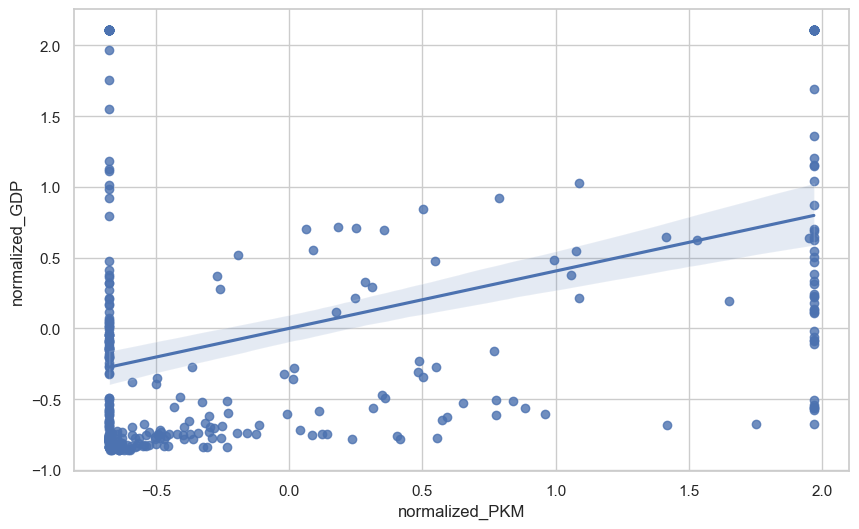

In [35]:
plt.figure(figsize=(10,6))
sns.regplot(x='normalized_PKM', y='normalized_GDP', data=df)
plt.show()

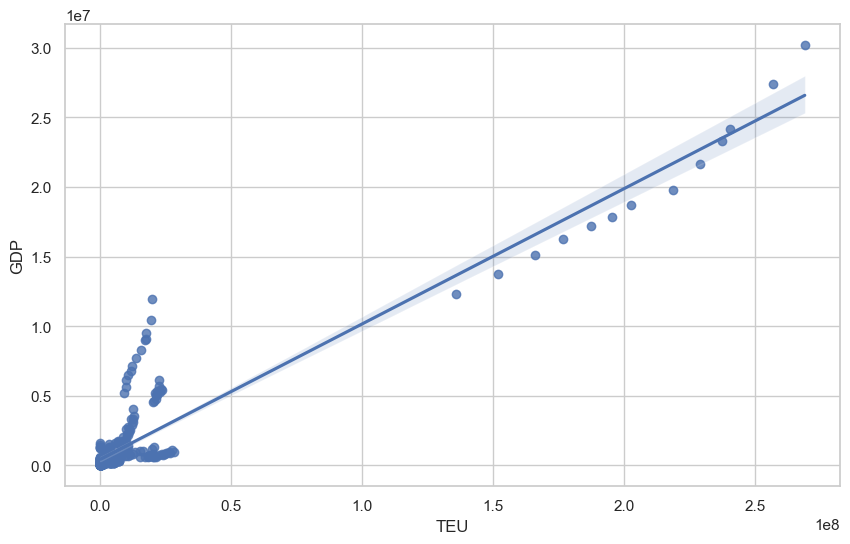

In [9]:
plt.figure(figsize=(10,6))
sns.regplot(x='TEU', y='GDP', data=df)
plt.show()

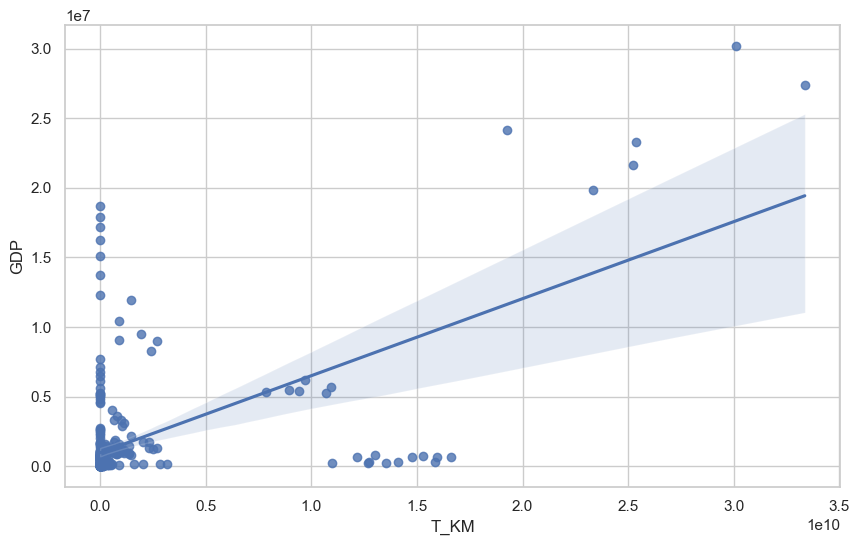

In [10]:
plt.figure(figsize=(10,6))
sns.regplot(x='T_KM', y='GDP', data=df)
plt.show()

In [23]:
P_KM = 34006284775.40483
TEU = 12557008.969696969
T_KM = 1256345488.9256198

In [24]:
pred = results.predict([1, P_KM, TEU, T_KM])
pred

array([1663007.33057851])

In [20]:
print(df['P_KM'].corr(df['GDP']))
print(df['TEU'].corr(df['GDP']))
print(df['T_KM'].corr(df['GDP']))

0.6470009398271567
0.9282074563876654
0.5884635317590838


In [22]:
print(df['P_KM'].mean())
print(df['TEU'].mean())
print(df['T_KM'].mean())
print(df['GDP'].mean())

34006284775.40483
12557008.969696969
1256345488.9256198
1663007.3305785125
